In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [106]:
demand = [21300,20177,23585,21840,21330,21960] # bovine demand ex.

In [147]:
class Forecast:
    def __init__(self, data, data2 = None):
        self.data = data
        if data2 is None:
            self.x = [i+1 for i in range(len(self.data))]
        else:
            self.x = data2
            
        self.results = {}
        
    def show_chart(self, title):
        plt.style.use("dark_background")
        plt.scatter(self.x, self.data)
        plt.title(title)
        plt.show()
        
    
    def reg_lin(self,x):
        return self.slope * x + self.intercept
    
            
    def Linear_regression(self):
        self.slope, self.intercept, r, p, std_err = stats.linregress(self.x,self.data)
        line = [self.slope * x + self.intercept for x in self.x]
        
        plt.plot(self.x, line)
        
        Forecast.show_chart(self, "Linear Regression")

        forecast =  round(Forecast.reg_lin(self,max(self.x)+1),0)
        
        print("Linear Regression R:",round(r,2)) #r = coeficiente de correlação perto de 1 ou -1 é correlacionado
        
        print("Forecast for the next period: ", forecast)
        
        self.results.update({"Linear Regression":forecast,"r":round(r,2)})
        
        return round(r,2)
    
    def Polynomial_regression(self):
        polireg = np.poly1d(np.polyfit(self.x, self.data, 3))
        line = np.linspace(1, max(self.x),10)
        

        plt.plot(line, polireg(line))
        Forecast.show_chart(self, "Polynomial Regression")
        
        r = round(r2_score(self.data,polireg(self.x)),2)
        forecast = round(polireg(max(self.x) + 1),0)
        
        print("Polynomial Regression R:",r) #r = coeficiente de correlação perto de 1 ou -1 é correlacionado
        
        print("Forecast for the next period: ", forecast)
                
        self.results.update({"Polynomial Regression":forecast,"r":round(r,2)})
        
        return round(r,2)
    
    def train_poly1d(self):
        train_x = self.x
        train_y = self.data

        test_x = self.x
        test_y = self.data

        mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

        myline = np.linspace(1, max(self.x), 100)

        plt.plot(myline, mymodel(myline))
        Forecast.show_chart(self,"Poly1d Regression")

        r = round(r2_score(test_y, mymodel(test_x)))
        
        forecast = max(mymodel(7),2)
        
        print("Poly1d Regression R:",r)
        
        print("Forecast for the next period: ", forecast)

        self.results.update({"Poly1d Regression":forecast,"r":round(r,2)})
        
        return round(r ,2)

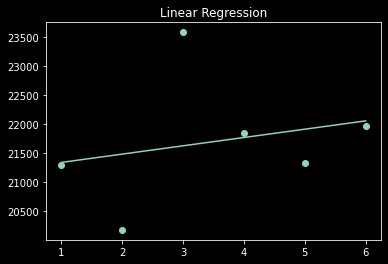

Linear Regression R: 0.24
Forecast for the next period:  22200.0


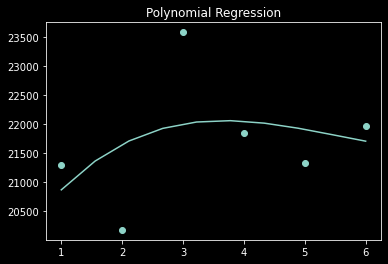

Polynomial Regression R: 0.15
Forecast for the next period:  21564.0


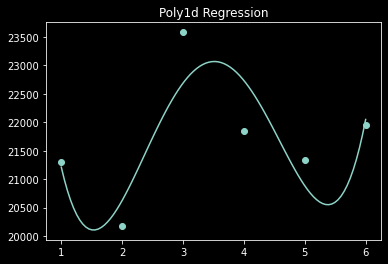

Poly1d Regression R: 1
Forecast for the next period:  35947.833333332645


In [150]:
forecast=Forecast(data=demand)

lin = forecast.Linear_regression()
pol = forecast.Polynomial_regression()
p1d = forecast.train_poly1d()